<a href="https://colab.research.google.com/github/jeel-coder/Synapse_LP/blob/week4/Copy_of_Synapse_LP_Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 4**

## **DJS Synapse Learning Period**
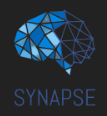

Congratulations on making it this far!! Welcome to the world of classification where we move on from unsupervised to helping the algorithms by telling them exactly what the data we're feeding them is. This week we'll be looking into  many algorithms such as Decision Trees, SVC, Naive Bayes, Random Forest and so on. We'll also be delving into hyperparameter tuning the only place where ched chaad can lead to a good result.

**Warning: This task contains many theory questions. Proceed with caution!**

Jk, make sure you research well and make sure you are understanding the models y'all are implementing as that will make your concepts much stronger and build a strong ML foundation which will be very useful as we move further with the tasks.

### Overfitting and Underfitting [VERY IMPORTANT]:
https://www.youtube.com/watch?v=T9NtOa-IITo
Note : This concept can be seen in K Means and decision trees. In fact, we will look deeper into
this when we begin deep learning.

## Importing the dataset

Use this link to download the adult income dataset and upload it to your drive.

https://drive.google.com/file/d/1VAE1qF16D-sKnBOWXzGXVNGhtNZNLFQS/view?usp=sharing

In [119]:
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#import your dataset here
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/adult_income_dataset.csv')
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
df.shape

(32561, 15)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Dealing with Nan values

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df.isna().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,1843
relationship,0
race,0
sex,0


In [ ]:
#write a code to find the nan values for the dataset and make a decision on whether to dropna or fill na

df=df.dropna()

In [ ]:
df.isna().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


## Object Valued Columns

For Relationship, Race and Sex find out the max division average fnlwgt for each unique value.

In [ ]:
#Write your code here
relationship_avg = df.groupby('relationship')['fnlwgt'].mean().max()
race_avg = df.groupby('race')['fnlwgt'].mean().max()
sex_avg = df.groupby('sex')['fnlwgt'].mean().max()
print(relationship_avg)
print(race_avg)
print(sex_avg)

206017.29921259842
228807.4554490593
191650.24607458292


## Getting rid of unnecessary columns

*   Drop the education num column since we already have their education in the form of categories
*   Check the combinations of the marital-status and relationship column, see if we need both of them or just marital status will work too.


In [ ]:
#write your code here
df=df.drop(columns='education-num')

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'income'],
      dtype='object')

In [ ]:

unique_combinations = df[['marital-status', 'relationship']].drop_duplicates()
print(unique_combinations)


              marital-status    relationship
0              Never-married   Not-in-family
1         Married-civ-spouse         Husband
2                   Divorced   Not-in-family
4         Married-civ-spouse            Wife
6      Married-spouse-absent   Not-in-family
12             Never-married       Own-child
17             Never-married       Unmarried
19                  Divorced       Unmarried
21                 Separated       Unmarried
32                  Divorced       Own-child
33        Married-civ-spouse       Own-child
37         Married-AF-spouse            Wife
71                 Separated       Own-child
74        Married-civ-spouse  Other-relative
110            Never-married  Other-relative
147                  Widowed       Unmarried
159                Separated  Other-relative
169                  Widowed   Not-in-family
175    Married-spouse-absent       Unmarried
230                Separated   Not-in-family
233                 Divorced  Other-relative
485    Mar

we won't delete the relationships column as it adds extra information to dataset.eg:Never-married relates to own child,not in family,unmarried

## Dealing with Categorical Data
As you probably know by now, the ML models dont know how to deal with String or object type data... so your mission shall you choose to accept it (don't really have much of a choice) is to find out which columns to do one hot encoding on and which columns to do Label Encoding on.

**Hint: Since Marital-status has less number of columns, One Hot encode it**

One-Hot Encoding (nominal)unordered
*   eg:Race: Categories like White, Black, Asian-Pac-Islander, Other. These categories have no inherent order or ranking.

Label Encoding (ordinal)ordered
*   Education Level: Categories like Preschool, High-school, Bachelors, Masters, Doctorate. These categories have a clear progression or order: Preschool < High-school < Bachelors < Masters < Doctorate.
 (Preschool = 0, High-school = 1, Bachelors = 2, etc.).




In [ ]:
#Write your code here
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['education']=le.fit_transform(df['education'])


In [ ]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,9,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,11,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,1,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,9,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
column_sizes = df.count()
print(column_sizes)

age               30162
workclass         30162
fnlwgt            30162
education         30162
marital-status    30162
occupation        30162
relationship      30162
race              30162
sex               30162
capital-gain      30162
capital-loss      30162
hours-per-week    30162
native-country    30162
income            30162
dtype: int64


In [ ]:
df.shape

(30162, 14)

In [ ]:
cols = ['sex','workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
df = pd.get_dummies(df, columns=cols,dtype=int)

In [ ]:
df.head()

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,income,sex_Female,sex_Male,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,9,2174,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,9,0,0,13,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,11,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,1,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,9,0,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,0


## Altering the Target Column
Modify the Target Column (income) to make sure that all the values which are <=50K are replaced with a 0 and the values >50K are replaced with a 1.

In [ ]:
#write your code here
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
#for i in df['income']:# didn't work
#    if i==('<=50K'):
#      i=0
 #   else:
#    i=1

In [ ]:
#df['income'] = df['income'].map(lambda x: 0 if x == '<=50K' else 1)# didn't work


In [ ]:
df['income'] = df['income'].map({'<=50K':0,'>50K':1})

In [ ]:
#df['income'] = df['income'].apply(lambda x: 0 if x == '<=50K' else 1)# work

In [ ]:
df.head()

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,income,sex_Female,sex_Male,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,9,2174,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,9,0,0,13,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,11,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,1,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.columns

Index(['age', 'fnlwgt', 'education', 'capital-gain', 'capital-loss',
       'hours-per-week', 'income', 'sex_Female', 'sex_Male',
       'workclass_Federal-gov', 'workclass_Local-gov', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent', 'marital-status_Never-married',
       'marital-status_Separated', 'marital-status_Widowed',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occ

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 89 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        30162 non-null  int64
 1   fnlwgt                                     30162 non-null  int64
 2   education                                  30162 non-null  int64
 3   capital-gain                               30162 non-null  int64
 4   capital-loss                               30162 non-null  int64
 5   hours-per-week                             30162 non-null  int64
 6   income                                     30162 non-null  int64
 7   sex_Female                                 30162 non-null  int64
 8   sex_Male                                   30162 non-null  int64
 9   workclass_Federal-gov                      30162 non-null  int64
 10  workclass_Local-gov                        30162 no

**Extract the target column(income) and store it in a seperate variable and remove it from the original dataset. Additionally, do a 70:30 Train Test Split**

In [ ]:
#write your code here
X = df.drop(columns=['income'])
y=df['income']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)


(21113, 88)
(21113,)


train_test_split(), the data is shuffled randomly before being split.This random shuffling means that the exact split will vary each time you run the code unless a random_state is set.
*  Reproducibility: Setting random_state to a specific number (e.g., random_state=42) ensures that you get the same random split every time you run the code.




### Chalo now that we have the preprocessed data we can feed it into the models. Lets start with some basic ones.

# Logistic Regression
*   Theory:https://www.youtube.com/watch?v=yIYKR4sgzI8&list=PLblh5JKOoLUKxzEP5HA2d-Li7IJkHfXSe
*   Implementation: https://www.youtube.com/watch?v=n40hS9tQmcY


Explain the algorithm, its working and its use cases.

In [ ]:
#import the model and apply it to the data
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameter={'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}

In [ ]:
classifier_regressor=GridSearchCV(lr,param_grid=parameter,scoring='accuracy',cv=5)

 **cv=5** refers to 5-fold cross-validation, which is a method used to assess the performance of a model more robustly than by just using a single train/test split. Here's how it works:

Data Split: The dataset is randomly split into 5 equal (or roughly equal) parts or "folds."

Training and Testing: The model is trained 5 times. For each iteration, the model is trained on 4 of the folds and tested on the remaining 1 fold. This process is repeated 5 times, each time using a different fold as the test set.

Evaluation: The performance metrics (such as accuracy, RMSE, etc.) are calculated for each iteration, and the results are averaged to get a more reliable estimate of the model's performance.

In [ ]:
classifier_regressor.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
330 fits failed out of a total of 495.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
165 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
print(classifier_regressor.best_params_)

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}


In [ ]:
print(classifier_regressor.best_score_)

0.7913605570451587


In [ ]:
y_pred=classifier_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
score=accuracy_score(y_pred,y_test)
print(score)

0.7852801414520941


Find the accuracy and confusion matrix for the same and explain what it shows.

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[6537,  230],
       [1713,  569]])

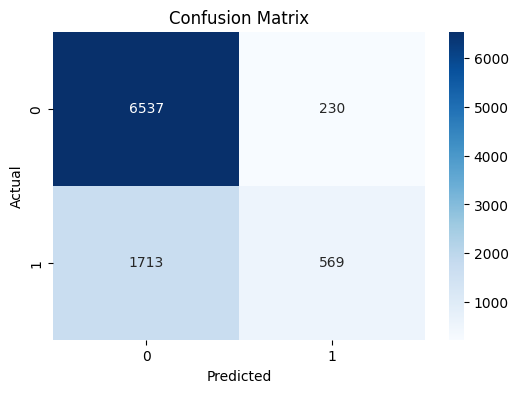

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Naive Bayes Algorithm
used for guessing categories of things. Imagine sorting emails into spam or inbox. Naive Bayes looks at each word (like a clue) and predicts how likely it is to be spam based on past emails. It assumes these words aren’t connected (not always true!), but it’s fast and works well, making it a popular choice for many tasks.

the features are independent that means changing the value of one feature doesn’t influence the values of other variables and this is why we call this algorithm “NAIVE”

eg: All the variables are independent. That is if the animal is Dog that doesn’t mean that Size will be Medium

· All the predictors have an equal effect on the outcome. That is, the animal being dog does not have more importance in deciding If we can pet him or not. All the features have equal importance.

normalization:
The most common method for normalization is Min-Max Scaling. The formula is
 X(norm)=X-X(min)/X(max)-X(min)
 Where:

*   X is the original value.
*   X(min) is the minimum value in the dataset for that feature.
*   X(norm)is the normalized value.
*   X(max) is maximum value in the dataset for that feature.
This formula scales the values of
X to a range of 0 to 1.








* Theory : https://youtu.be/jS1CKhALUBQ
* Theory:
https://www.analyticsvidhya.com/blog/2021/09/naive-bayes-algorithm-a-complete-guide-for-data-science-enthusiasts/
* Implementation : https://youtu.be/nHIUYwN-5rM

In [ ]:
#import the model from sklearn and apply it to your data
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:
print(X_train.shape)
print(y_train.shape)


(21113, 88)
(21113,)


In [ ]:
print(X_train.index)
print(y_train.index)


Index([29253, 14267, 26021, 24278,  4225, 30293,  5243, 27206, 16071,  3208,
       ...
        6801, 23868, 12203, 12930, 23280, 32171,  5875,   935, 17056, 25528],
      dtype='int64', length=21113)
Index([29253, 14267, 26021, 24278,  4225, 30293,  5243, 27206, 16071,  3208,
       ...
        6801, 23868, 12203, 12930, 23280, 32171,  5875,   935, 17056, 25528],
      dtype='int64', length=21113)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X and y are correctly defined DataFrames/Series
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify shapes
print(X_train.shape)
print(y_train.shape)

# Initialize and fit the model
clf = LogisticRegression()
clf.fit(X_train, y_train)


(21113, 88)
(21113,)


LogisticRegression()

In [ ]:
clf.fit(X_train, y_train)

LogisticRegression()

In [ ]:
clf.score(X_test,y_test)

0.7852801414520941

In [ ]:
clf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
X_train_count = v.fit_transform(X_train)
X_train_count.toarray()[:]

array([[0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model1 = MultinomialNB()
model1.fit(X_train,y_train)

MultinomialNB()

In [ ]:

model1.score(X_test, y_test)

0.7717979887280363

In [ ]:
model1.score(X_train, y_train)

0.7777198882205276

# Decision Tree Classifier
* Theory : https://youtu.be/7VeUPuFGJHk
* Theory: https://www.analyticsvidhya.com/blog/2021/08/decision-tree-algorithm/
* Implementation : https://youtu.be/HY2DcBhgwm0

what should be the root node?To decide this, there is a metric called “Entropy” which is the amount of uncertainty in the dataset.

In [ ]:
#import the decision tree from sklearn and run it on your data

from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt_model=DecisionTreeClassifier(random_state=10)

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [ ]:
dt_model.score(X_train,y_train)

1.0

In [ ]:
dt_model.score(X_test,y_test)

0.8088186539949166

In [ ]:
dt_model.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
dt_model.predict_proba(X_test)

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

<b>Print the Model Accuracy</b>

In [ ]:
y_pred=dt_model.predict_proba(X_test)[:,1]

In [ ]:
new_y=[]
for i in range(len(y_pred)):
  if y_pred[i]<0.6:# 0.6 threshhold and predict func takes 0.5 as by default threshhold
    new_y.append(0)
  else:
    new_y.append(1)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,new_y)

0.8088186539949166

In [ ]:
from sklearn.tree import DecisionTreeClassifier

train_accuracy = []
validation_accuracy = []

for depth in range(1, 10):

    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))

    validation_accuracy.append(dt_model.score(X_test, y_test))


In [ ]:
frame=pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.752475,0.747817
1,2,0.800028,0.791248
2,3,0.800786,0.791800
3,4,0.817506,0.811802
4,5,0.818311,0.812023


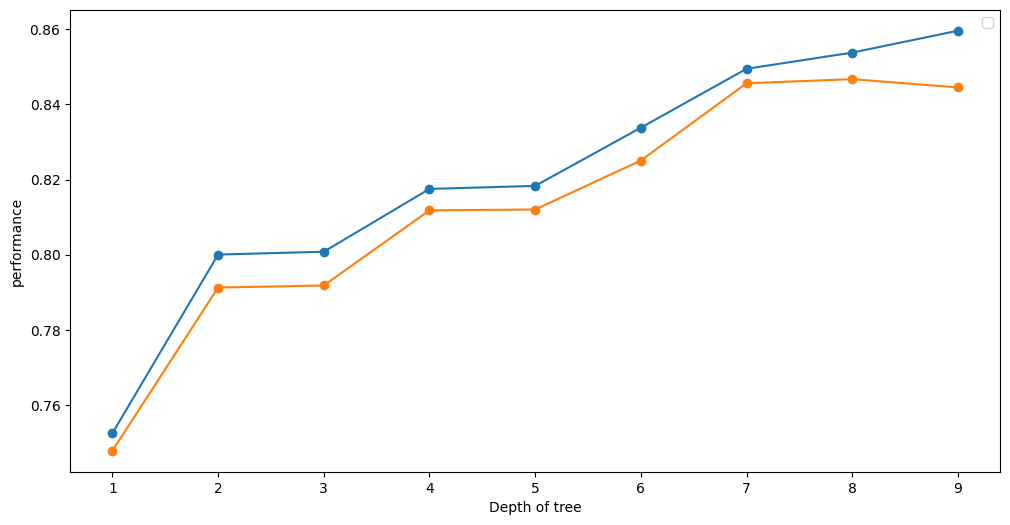

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'],marker='o')
plt.plot(frame['max_depth'],frame['valid_acc'],marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

parameters:
max_leaf_nodes
min_samples_split
min_samples_leaf

In [ ]:
dt_model=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=25,random_state=10)

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, random_state=10)

In [ ]:
dt_model.score(X_test,y_test)

0.847938998784396

In [ ]:
dt_model.score(X_train,y_train)

0.8498555392412258

In [120]:
model=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=25,min_samples_leaf=10,min_samples_split=4,random_state=10,criterion='gini')

In [121]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=25, min_samples_leaf=10,
                       min_samples_split=4, random_state=10)

In [122]:
model.score(X_test,y_test)

0.847938998784396

In [123]:
model.score(X_train,y_train)

0.8498555392412258

In [125]:
mod=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=25,min_samples_leaf=10,min_samples_split=4,random_state=10,criterion='entropy')

In [126]:
mod.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=25,
                       min_samples_leaf=10, min_samples_split=4,
                       random_state=10)

In [128]:
mod.score(X_test,y_test)

0.8472759420930489

gini is better than entropy

## Explain: What are the differences in the working of Logistic Regression, Naive Bayes and Decision Tree and explain why are the accuracies are different.

Ans:
1. Logistic Regression:
.

* Working: Logistic regression is a linear model used for binary classification.  It estimates the probability that a given instance belongs to a certain class by applying the logistic (sigmoid) function to a linear combination of the input features. The output is a probability between 0 and 1, which is then thresholded (e.g., 0.5) to make the final class prediction.
* Assumptions: It assumes a linear relationship between the input features and
the log-odds of the outcome.(The odds ratio is the probability of success/probability of failure.)(logistic regression equation ln(p/(1−p)) ln ⁡ (p / (1 − p)) is the natural logarithm of the odds, also known as the “log-odds” or “logit.”)
*  Strengths: Works well when the classes are linearly separable, is robust to
 small changes in data, and easy to interpret.
Limitations: Poor performance on datasets where the classes are not linearly
*  Limitations: Poor performance on datasets where the classes are not linearly
separable. It's also sensitive to multicollinearity and irrelevant features.
2. Naive Bayes:
Working: Naive Bayes is a probabilistic classifier based on Bayes' Theorem. It

*  Working: Naive Bayes is a probabilistic classifier based on Bayes' Theorem. It assumes that the features are conditionally independent of each other given the class label (the "naive" assumption). It calculates the probability of each class and then picks the one with the highest posterior probability.(interested in finding the probability of some event “A” occurring after B has already happend)
*   Assumptions: The features are independent of each other, which is rarely true in real-world datasets.
*   Strengths: Works well with small datasets, is computationally efficient, and handles categorical data effectively. Performs well even when the independence assumption is violated, as long as the violations are not severe.
*  Limitations: The assumption of independence between features is often unrealistic, which can lead to lower accuracy if this assumption is strongly violated.
3. Decision Tree:

*   Working: A Decision Tree classifier builds a tree where each internal node
represents a decision based on a feature, and each leaf node represents a class label. It recursively splits the data into subsets based on the feature that maximizes a certain criterion (e.g., Gini impurity or information gain). It works by partitioning the space to achieve the best classification possible at each level of the tree.
*   Assumptions: No strong assumptions about the data. It is a non-parametric model and can capture complex relationships between features.

*   Strengths: Handles both categorical and numerical data, is interpretable, and captures non-linear relationships. It is also invariant to feature scaling and can model interactions between features.
*  Limitations: Prone to overfitting, especially when the tree is very deep. This can result in poor generalization to unseen data.









the **decision tree** gave the accurate resuls as it does spliting on the basis of features interaction.So if the features are dependent or independent it will give better results

**Logistic regression** can only model interactions between features if you manually add interaction terms to the model. If your data requires interaction terms but you haven’t included them, logistic regression might underperform.
**Naive Bayes** assumes that the features are independent. If the features are highly correlated or interact with each other, this assumption breaks down, leading to poor performance.

### Mention some real life use cases for each of these three models:

Ans:
1. **Logistic Regression:**
Healthcare: Disease Prediction
Logistic regression is commonly used to predict whether a patient has a particular disease (e.g., diabetes, heart disease) based on diagnostic features like age, BMI, blood pressure, etc. It helps estimate the probability of a patient falling into a high-risk category.
2. **Naive Bayes:**
Email Filtering: Spam Detection
Naive Bayes is widely used for classifying emails as spam or non-spam based on the frequency of certain words and patterns in the email text. Its simplicity and effectiveness in text classification tasks make it a good choice here.
3. **Decision Trees**:Fraud Detection:
Decision trees can be used by financial institutions to detect fraudulent transactions. They help classify transactions as legitimate or suspicious by considering factors like transaction amount, location, frequency, and timing.

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [ ]:
#plot a graph that shows the train and test accuracy for increasing depth of the tree (do for 10)

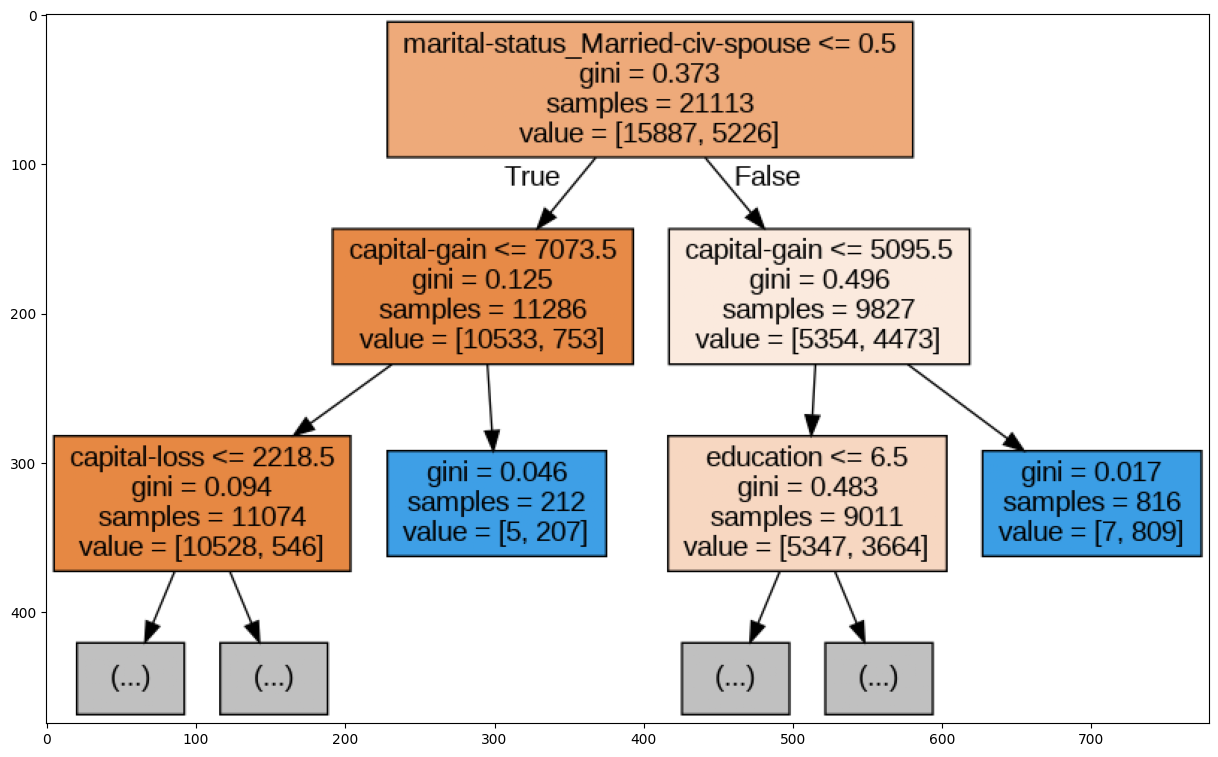

In [ ]:
#complete the code below to create an image of the decision tree
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(dt_model, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

<b>print the test accuracy and train accuracy here</b>

In [130]:
#write code here
from sklearn.tree import DecisionTreeClassifier
ta = []
va= []

for msl in range(1, 10):

    dt_model = DecisionTreeClassifier(min_samples_leaf=msl, random_state=10)
    dt_model.fit(X_train, y_train)
    ta.append(dt_model.score(X_train, y_train))

    va.append(dt_model.score(X_test, y_test))

In [131]:
frame=pd.DataFrame({'min_samples_leaf':range(1,10),'train_acc':train_accuracy,'valid_acc':validation_accuracy})
frame.head()

,min_samples_leaf,train_acc,valid_acc
0,1,0.752475,0.747817
1,2,0.800028,0.791248
2,3,0.800786,0.791800
3,4,0.817506,0.811802
4,5,0.818311,0.812023


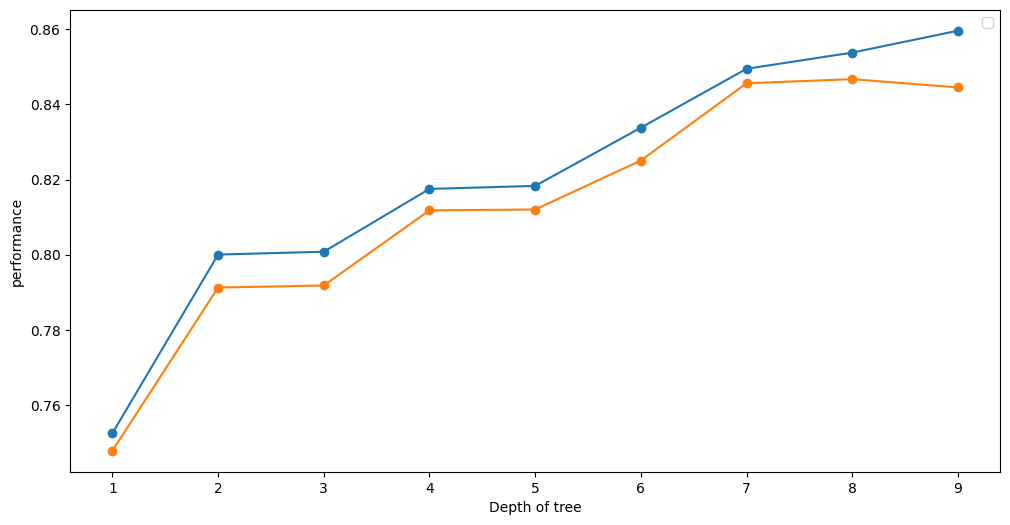

In [134]:
plt.figure(figsize=(12,6))
plt.plot(frame['min_samples_leaf'],frame['train_acc'],marker='o')
plt.plot(frame['min_samples_leaf'],frame['valid_acc'],marker='o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

### Explain the different hyperparameters you changed and how did it affect the models. Also give a summary of the graphs you made.

Ans:the hyperparameters i changed are max_leaf_nodes, min_samples_split ,min_samples_leaf but not getting any change

from the above ploted graph i undertood that head node or root node is taking condition for marital_status married civ spouse <=0.5 .then the further division happens on the basis of capital gain and so on

## Optimizing Methods

ensemble means combining multiple methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import numpy as np
# no.of trees in random forest
n_estimators =[int(x) for x in np.linspace(start =10,stop=80,num=10)]
#number of features to consider at every split
max_feature =['auto','sqrt']
#minimum no. of levels in the tree
max_depth=[2,4]
# minimum number of samples required to split a node
min_samples_split =[2,5]
#minimum number of samples required at each leaf node
min_samples_leaf=[1,2]
# method of selecting samples for training each tree
bootstrap=[True,False]

In [ ]:
param_grid={'n_estimators':n_estimators,
            'max_features':max_feature,
            'max_depth':max_depth,
            'min_samples_split':min_samples_split,
            'min_samples_leaf':min_samples_leaf,
            'bootstrap':bootstrap}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
rf_model=RandomForestClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
rf_Grid=GridSearchCV(estimator=rf_model,param_grid=param_grid,cv=3,verbose=2,n_jobs=4)

In [ ]:
rf_Grid.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
265 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             verbose=2)

In [ ]:
rf_Grid.best_params_# if the accutacy is one overfitting

{'bootstrap': False,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 17}

In [ ]:
rf_Grid.score(X_train,y_train)

0.7948657225406148

In [ ]:
rf_Grid.score(X_test,y_test)

0.7879323682174826

### 1. Bagging

Now, you create a bootstrapped sample by randomly selecting 5 data points with replacement:

Index	Bootstrapped Sample
1	A
2	D
3	A
4	C
5	E
In this example, data point "A" was selected twice, "D", "C", and "E" were selected once, and **"B"** was not selected at all.

Why Use Bootstrapped Datasets?
**Reducing Overfitting:** In ensemble methods like Bagging and Random Forests, bootstrapping helps reduce overfitting. By creating multiple bootstrapped datasets and training separate models on each one, the variance of the individual models' predictions is reduced when their outputs are combined

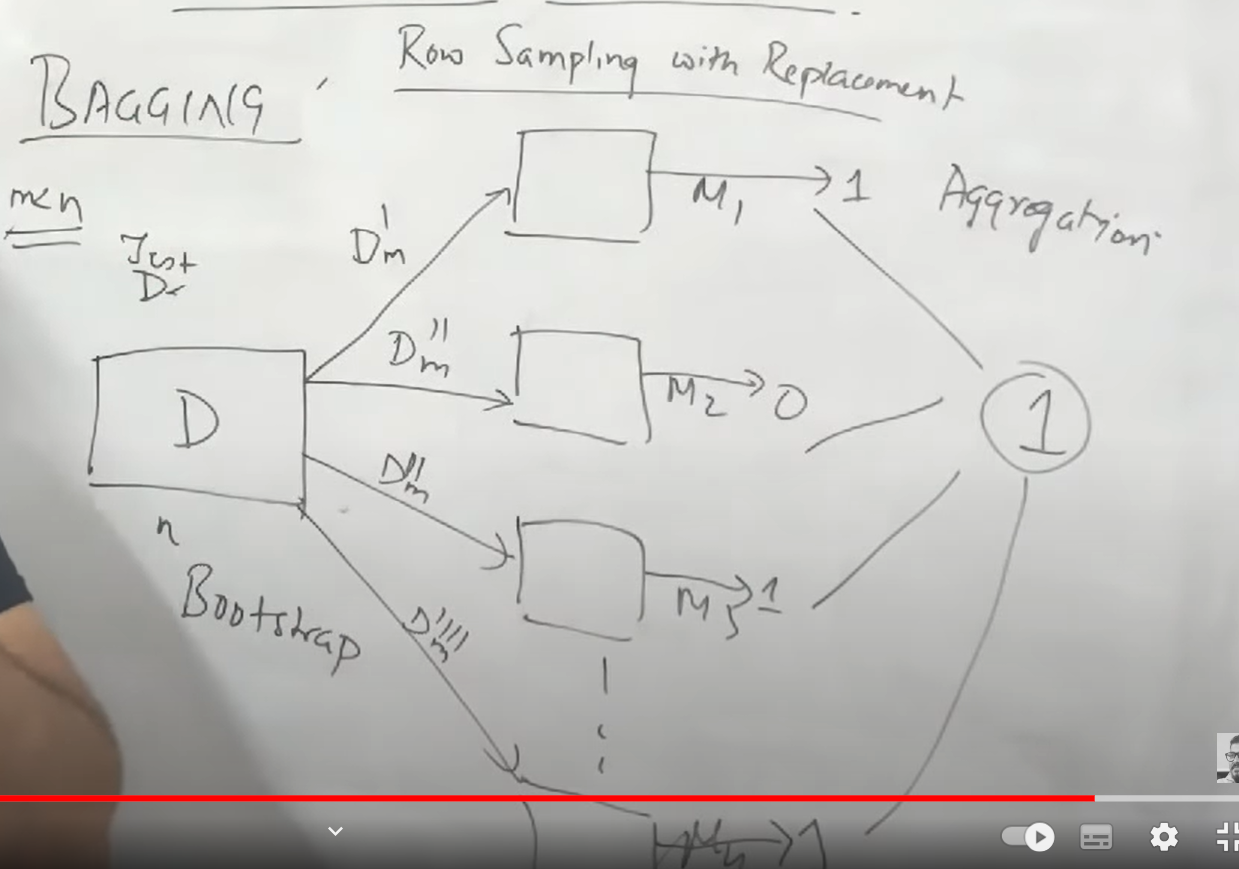

* Theory : https://www.youtube.com/watch?v=KIOeZ5cFZ50
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* Implementation : https://www.youtube.com/watch?v=MxiktOPmhV8&t=2s

In [ ]:
#implement Random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=8,max_leaf_nodes=25,min_samples_leaf=10,min_samples_split=4,random_state=10)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, max_leaf_nodes=25, min_samples_leaf=10,
                       min_samples_split=4, random_state=10)

In [ ]:
y_pred=rf.predict(X_test)

In [ ]:
#find the accuracy
rf.score(X_train,y_train)

0.8411878937147729

In [ ]:
rf.score(X_test,y_test)

0.8381036578627473

### Explain the difference between random forest and decision tree. Also think of cases where the outputs for both of them can be same if its possible.

Ans: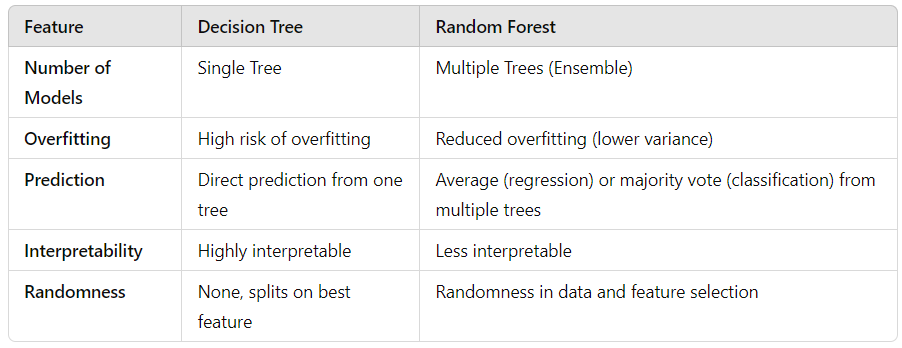

Random Forest can give the same output as a decision tree in cases where there is only one tree or if the randomness in data and feature selection is not applied

In [ ]:
#write a code to implement BaggingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
base_estimator = DecisionTreeClassifier()

In [ ]:
bagging_clf = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=42)

In [ ]:
bagging_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
y_pred = bagging_clf.predict(X_test)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print(accuracy)

0.8406453751795778


In [ ]:
bagging_clf.score(X_train, y_train)

0.9863591152370578

In [ ]:
bagging_clf.score(X_test, y_test)

0.8406453751795778

### Explain how are Bagging and Random Forest different and why do we do bagging?


Ans:
**point1:**

*   process: Bagging involves creating multiple models (often the same model type, like decision trees) by training each model on a different bootstrap sample of the data. A bootstrap sample is generated by randomly sampling from the original dataset with replacement, so each model is trained on a slightly different subset of the data.
*   Process: Random Forest is an extension of bagging that specifically applies to decision trees. It not only uses bootstrapped samples for each tree but also introduces an additional layer of randomness. At each split in a tree, a random subset of features is selected, and the best feature from this subset is used for splitting. This means that not all features are considered at each decision point, which forces the trees to be more diverse.

**point2:**

*   Bagging uses all available features at each split.
*   Random Forest uses a random subset of features at each split.

**point3:**
*   Bagging relies on the diversity of models from different bootstrapped datasets.
*   Random Forest adds diversity through both bootstrapping and feature randomness.








### 2. Boosting

* Theory : https://www.youtube.com/watch?v=NLRO1-jp5F8&t=724s
* Theory :
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
*   Theory:https://www.geeksforgeeks.org/ml-xgboost-extreme-gradient-boosting/
* Implementation : https://www.youtube.com/watch?v=7xHM93WXOu8

In [ ]:
#write code here
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [ ]:
ada_model=AdaBoostClassifier(n_estimators=100,learning_rate=1,random_state=42)

n_estimators train 100 models

In [ ]:
model2=ada_model.fit(X_train,y_train)

In [ ]:
model2.score(X_train,y_train)

0.8619334059584143

In [ ]:
model2.score(X_test,y_test)

0.8626367554425903

**and if we have converted our object daraset to numeric dataset using label encoding and one hot encoding is there the need to do tranforn on train dataset?**
If your model is not sensitive to the scale of numeric values (like tree-based algorithms), then simply converting categorical features to numeric values using Label Encoding or One-Hot Encoding might be sufficient.but if not then do tranform

Just to make things more interesting implement XGBoost as well and compare its accuracy with that of AdaBoost :)

In [ ]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
xgb_model.score(X_train,y_train)

0.8640174300194193

In [ ]:
xgb_model.score(X_test,y_test)

0.8618631893026854

### Explain: What is the difference between Adaboost and XGBoost. Also describe in what cases is XGBoost better to use than AdaBoost.

Ans:

## Explain: What is the difference between Bagging and Boosting? Explain with examples

Ans: in bagging
we split the dataset  by bootsrapping on it and each model runs different dataset this avoids overfitting and the output is predicted on average of all the models' predictions.
in boosting
we create a model and it finds the errors in it which are sent to the next model and the link continues till we get the optimum result

Bagging: Random Forest, a bagging technique, can be used to handle this issue. By training multiple decision trees on different subsets of the data, Random Forest reduces overfitting and improves the ability to detect fraudulent transactions across diverse patterns. Additionally, Random Forest can manage imbalanced datasets by assigning different weights to classes during training.

Gradient Boosting (e.g., XGBoost, LightGBM) is widely used in financial institutions to model credit risk. It sequentially builds decision trees that minimize prediction errors, improving the ability to distinguish between low-risk and high-risk customers

### 3. Pruning Techniques



*   Theory: https://opendatascience.com/what-is-pruning-in-machine-learning/
*   Theory:https://towardsdatascience.com/build-better-decision-trees-with-pruning-8f467e73b107



In [ ]:
#implement pruning
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
clf = tree.DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

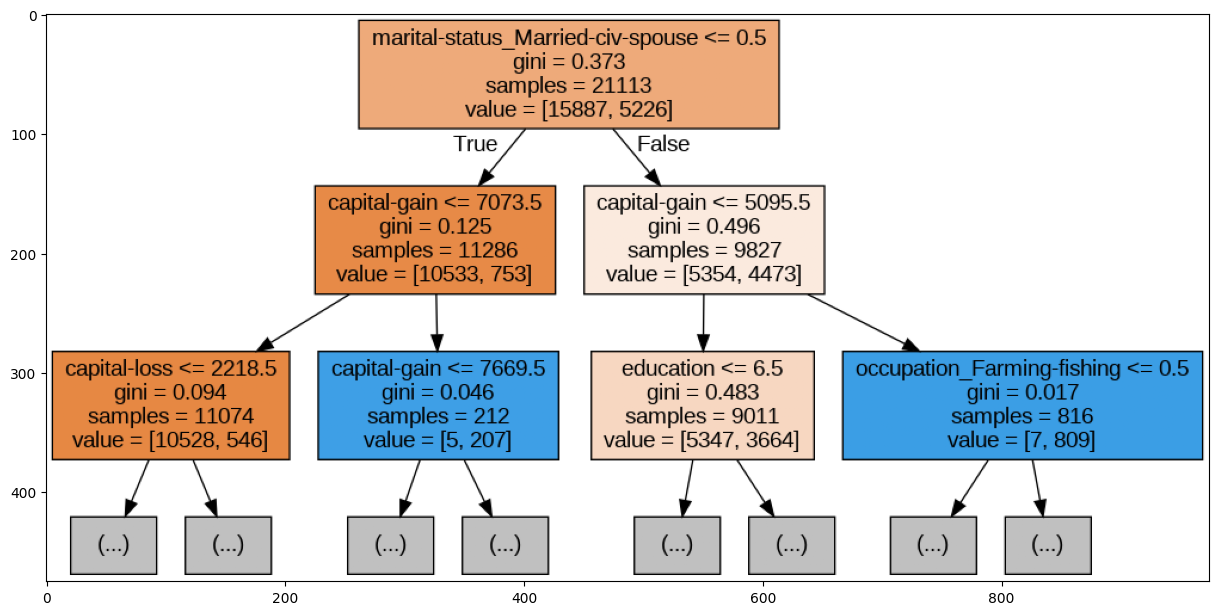

In [ ]:
#plot a tree (image) similar to one created for decision tree (graphwiz) for the pruning technique
from sklearn import tree
!pip install graphviz
decision_tree = tree.export_graphviz(clf, out_file='tree.dot', feature_names=X_train.columns, max_depth=2, filled=True)
!dot -Tpng tree.dot -o tree.png # to convert the file
image = plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

In [ ]:
#write your code here

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

As a brush up on data visualisation... make a graph to compare the accuracies you achieved for each of the models you trained and explain which one is the best to perform classification tasks and why?

In [ ]:
#write your code here

# **Bonus: To be done only if you have completed the above tasks.**

Ensemble Models are not only used for classification but also for Regression.Research on the various regression models such as XGBoost Regressor and Random Forest regressor and how are they different from the Linear Regression model we made in Task 2. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2024 - 2025